In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv("reservas_hoteles.csv")
dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
dataset.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
dataset_2= dataset[['arrival_year', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights','arrival_month']]
dataset_2

,arrival_year,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,arrival_month
0,2017,2,0,1,2,10
1,2018,2,0,2,3,11
2,2018,1,0,2,1,2
3,2018,2,0,0,2,5
4,2018,2,0,1,1,4
...,...,...,...,...,...,...
36270,2018,3,0,2,6,8
36271,2018,2,0,1,3,10
36272,2018,2,0,2,6,7
36273,2018,2,0,0,3,4


In [6]:
eje_x=dataset_2["arrival_month"].unique()
ejex=sorted(eje_x)


In [38]:

eje_y = dataset_2.groupby([ "arrival_year", "arrival_month"])['no_of_adults'].sum().reset_index().sort_values(["arrival_year", "arrival_month"])
eje_y



,arrival_year,arrival_month,no_of_adults
0,2017,7,659
1,2017,8,1882
2,2017,9,2895
3,2017,10,3278
4,2017,11,1059
5,2017,12,1691
6,2018,1,1651
7,2018,2,2888
8,2018,3,4432
9,2018,4,5178


C:\Users\laigu\AppData\Local\Temp\ipykernel_21704\2363951215.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dataset, x='arrival_month', y='avg_price_per_room', hue='booking_status',


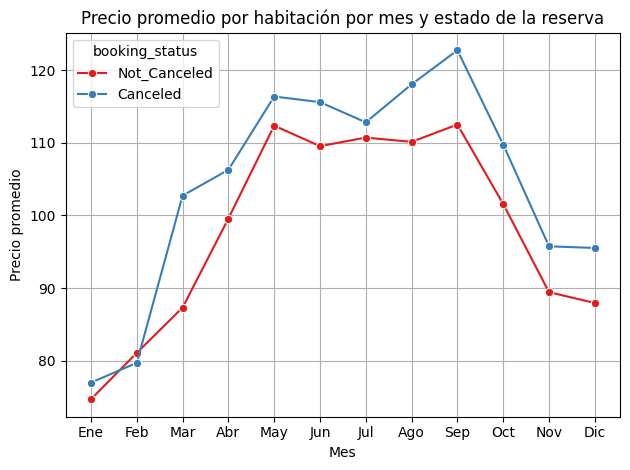

In [8]:
# 1. Precio promedio por habitación por mes y estado de la reserva
plt.figure()
sns.lineplot(data=dataset, x='arrival_month', y='avg_price_per_room', hue='booking_status', 
             estimator='mean', ci=None, marker='o', palette='Set1')
plt.title('Precio promedio por habitación por mes y estado de la reserva')
plt.xlabel('Mes')
plt.ylabel('Precio promedio')
plt.xticks(ticks=range(1, 13), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.grid(True)
plt.tight_layout()
ruta_guardado = os.path.join (r'A:/Clases/Practica_Hotel/graficos', 'avg_room.png')
plt.savefig(ruta_guardado)
plt.show()



C:\Users\laigu\AppData\Local\Temp\ipykernel_21704\828355274.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='market_segment_type', y='avg_price_per_room', hue='booking_status',


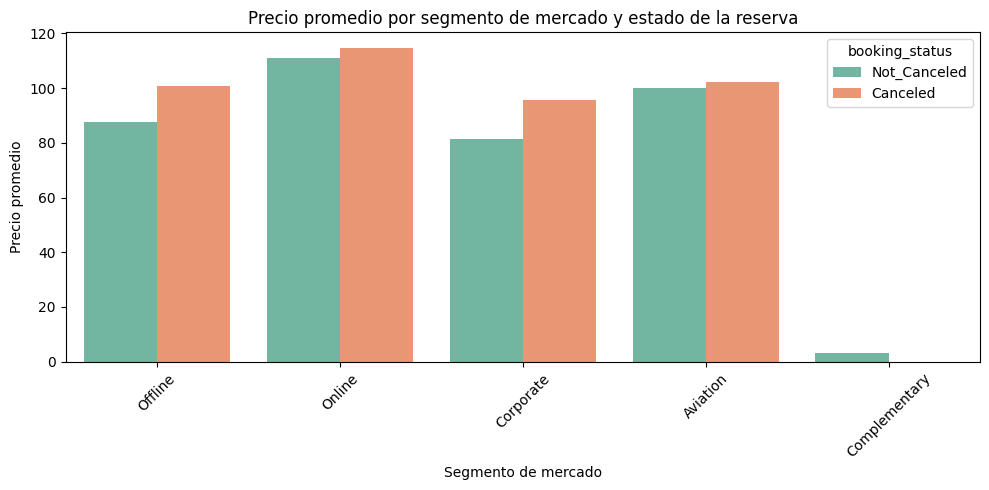

In [31]:
# 2. Precio promedio por segmento de mercado y estado de la reserva
plt.figure(figsize=[10,5])
sns.barplot(data=dataset, x='market_segment_type', y='avg_price_per_room', hue='booking_status', 
            estimator='mean', ci=None, palette='Set2')
plt.title('Precio promedio por segmento de mercado y estado de la reserva')
plt.xlabel('Segmento de mercado')
plt.ylabel('Precio promedio')
plt.xticks(rotation=45)
plt.tight_layout()
ruta_guardado = os.path.join (r'A:/Clases/Practica_Hotel/graficos', 'avg_seg.png')
plt.savefig(ruta_guardado)
plt.show()



In [ ]:
# 3. Tipo de habitación y estado de la reserva

room_type=dataset.groupby(['room_type_reserved','booking_status']).count()["Booking_ID"].reset_index()
room_type

,room_type_reserved,booking_status,Booking_ID
0,Room_Type 1,Canceled,9072
1,Room_Type 1,Not_Canceled,19058
2,Room_Type 2,Canceled,228
3,Room_Type 2,Not_Canceled,464
4,Room_Type 3,Canceled,2
5,Room_Type 3,Not_Canceled,5
6,Room_Type 4,Canceled,2069
7,Room_Type 4,Not_Canceled,3988
8,Room_Type 5,Canceled,72
9,Room_Type 5,Not_Canceled,193


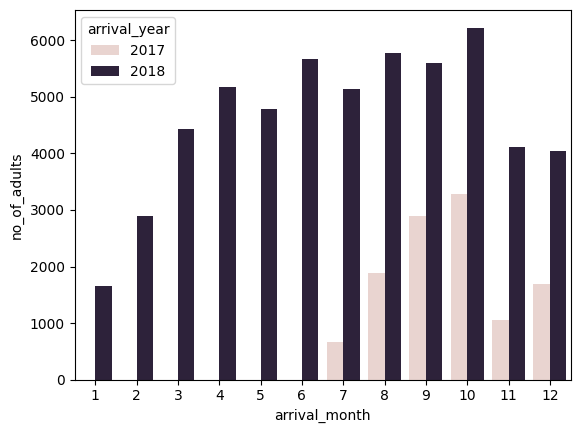

In [53]:
# Numero de adultos por año que se hospedaron por mes

ax = sns.barplot(x="arrival_month", y='no_of_adults',  data=eje_y, hue="arrival_year")
ruta_guardado = os.path.join (r'A:/Clases/Practica_Hotel/graficos', 'reserva_year.png')
plt.savefig(ruta_guardado)

se selcciona las columnas para analizar las cancelaciones en funcion  si tienen o no menores. (numero de adultos, numero de menores, estado de la reserva, meses)

In [12]:
dataset3=dataset[['arrival_year','no_of_adults', 'no_of_children','no_of_weekend_nights', 'no_of_week_nights','booking_status','arrival_month']]
dataset3

,arrival_year,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,booking_status,arrival_month
0,2017,2,0,1,2,Not_Canceled,10
1,2018,2,0,2,3,Not_Canceled,11
2,2018,1,0,2,1,Canceled,2
3,2018,2,0,0,2,Canceled,5
4,2018,2,0,1,1,Canceled,4
...,...,...,...,...,...,...,...
36270,2018,3,0,2,6,Not_Canceled,8
36271,2018,2,0,1,3,Canceled,10
36272,2018,2,0,2,6,Not_Canceled,7
36273,2018,2,0,0,3,Canceled,4


cambio de cantidad de chicos por "Yes" o ""No" si tiene o no menores

In [13]:
dataset3["has_children"] = np.where(dataset3['no_of_children']>0, "Yes","No")
dataset3



C:\Users\laigu\AppData\Local\Temp\ipykernel_21704\2649767072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3["has_children"] = np.where(dataset3['no_of_children']>0, "Yes","No")


,arrival_year,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,booking_status,arrival_month,has_children
0,2017,2,0,1,2,Not_Canceled,10,No
1,2018,2,0,2,3,Not_Canceled,11,No
2,2018,1,0,2,1,Canceled,2,No
3,2018,2,0,0,2,Canceled,5,No
4,2018,2,0,1,1,Canceled,4,No
...,...,...,...,...,...,...,...,...
36270,2018,3,0,2,6,Not_Canceled,8,No
36271,2018,2,0,1,3,Canceled,10,No
36272,2018,2,0,2,6,Not_Canceled,7,No
36273,2018,2,0,0,3,Canceled,4,No


se agrupa en funcion de los meses, y el has_children contabilizando el estado de la reserva cancelado no cancelado

In [14]:
cancelacion=dataset3.groupby(['arrival_year','arrival_month','has_children','booking_status']).agg(cant_stutus=('booking_status','count')).reset_index()
cancelacion

,arrival_year,arrival_month,has_children,booking_status,cant_stutus
0,2017,7,No,Canceled,241
1,2017,7,No,Not_Canceled,112
2,2017,7,Yes,Canceled,2
3,2017,7,Yes,Not_Canceled,8
4,2017,8,No,Canceled,175
...,...,...,...,...,...
66,2018,11,Yes,Not_Canceled,66
67,2018,12,No,Canceled,310
68,2018,12,No,Not_Canceled,1539
69,2018,12,Yes,Canceled,70


se selecciona solo las reservas canceladas, y año 2017

In [15]:
cancelacion_2017= cancelacion[(cancelacion['booking_status'] == 'Canceled') & (cancelacion['arrival_year'] == 2017 )]
cancelacion_2017

,arrival_year,arrival_month,has_children,booking_status,cant_stutus
0,2017,7,No,Canceled,241
2,2017,7,Yes,Canceled,2
4,2017,8,No,Canceled,175
6,2017,8,Yes,Canceled,10
8,2017,9,No,Canceled,179
10,2017,9,Yes,Canceled,3
12,2017,10,No,Canceled,299
14,2017,10,Yes,Canceled,3
16,2017,11,No,Canceled,25
18,2017,11,Yes,Canceled,2


grafico de barras, de cancelaciones por mes en funcion a si tiene chicos o no. 2017

C:\Users\laigu\AppData\Local\Temp\ipykernel_21704\3368833426.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cancelacion_2017, x='arrival_month', y='cant_stutus', hue='has_children',


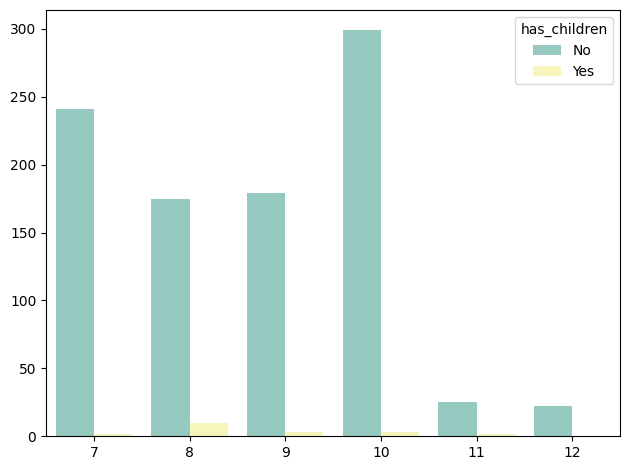

In [16]:
plt.figure()
sns.barplot(data=cancelacion_2017, x='arrival_month', y='cant_stutus', hue='has_children', 
            estimator='mean', ci=None, palette='Set3')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
ruta_guardado = os.path.join (r'A:/Clases/Practica_Hotel/graficos', 'canceld_child_2017.png')
plt.savefig(ruta_guardado)
plt.show()

se selecciona solo las reservas canceladas, y año 2018

In [17]:
cancelacion_2018= cancelacion[(cancelacion['booking_status'] == 'Canceled') & (cancelacion['arrival_year'] == 2018 )]
cancelacion_2018

,arrival_year,arrival_month,has_children,booking_status,cant_stutus
23,2018,1,No,Canceled,20
25,2018,1,Yes,Canceled,4
27,2018,2,No,Canceled,404
29,2018,2,Yes,Canceled,26
31,2018,3,No,Canceled,633
33,2018,3,Yes,Canceled,67
35,2018,4,No,Canceled,916
37,2018,4,Yes,Canceled,79
39,2018,5,No,Canceled,876
41,2018,5,Yes,Canceled,72


grafico de barras, de cancelaciones por mes en funcion a si tiene chicos o no. 2018

C:\Users\laigu\AppData\Local\Temp\ipykernel_21704\925042308.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cancelacion_2018, x='arrival_month', y='cant_stutus', hue='has_children',


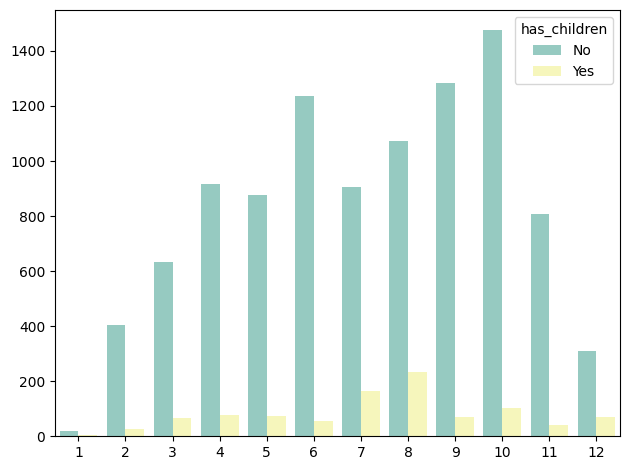

In [18]:
plt.figure()
sns.barplot(data=cancelacion_2018, x='arrival_month', y='cant_stutus', hue='has_children', 
            estimator='mean', ci=None, palette='Set3')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
ruta_guardado = os.path.join (r'A:/Clases/Practica_Hotel/graficos', 'canceled_child_2018.png')
plt.savefig(ruta_guardado)
plt.show()

Se analiza las reservas canceladas en funcion de las reservas realizadas por año y pro mes.


In [19]:
dataset.columns


Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [20]:
reserva_tot=dataset[['Booking_ID','arrival_year', 'arrival_month','booking_status']]
reserva_tot

,Booking_ID,arrival_year,arrival_month,booking_status
0,INN00001,2017,10,Not_Canceled
1,INN00002,2018,11,Not_Canceled
2,INN00003,2018,2,Canceled
3,INN00004,2018,5,Canceled
4,INN00005,2018,4,Canceled
...,...,...,...,...
36270,INN36271,2018,8,Not_Canceled
36271,INN36272,2018,10,Canceled
36272,INN36273,2018,7,Not_Canceled
36273,INN36274,2018,4,Canceled


In [21]:
res_year=reserva_tot.groupby(['arrival_year', 'arrival_month','booking_status']).count()["Booking_ID"].reset_index()
cancelacion
res_year

,arrival_year,arrival_month,booking_status,Booking_ID
0,2017,7,Canceled,243
1,2017,7,Not_Canceled,120
2,2017,8,Canceled,185
3,2017,8,Not_Canceled,829
4,2017,9,Canceled,182
5,2017,9,Not_Canceled,1467
6,2017,10,Canceled,302
7,2017,10,Not_Canceled,1611
8,2017,11,Canceled,27
9,2017,11,Not_Canceled,620


C:\Users\laigu\AppData\Local\Temp\ipykernel_21704\1838223522.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=res_year, x='arrival_month', y='Booking_ID', hue='booking_status',


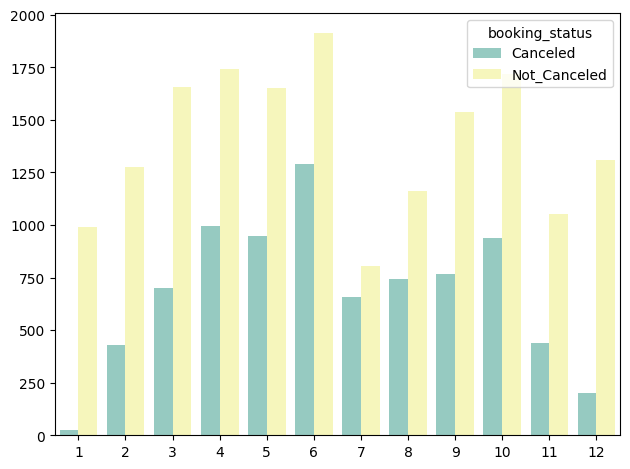

In [22]:
plt.figure()
sns.barplot(data=res_year, x='arrival_month', y='Booking_ID', hue='booking_status', 
            estimator='mean', ci=None, palette='Set3')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
ruta_guardado = os.path.join (r'A:/Clases/Practica_Hotel/graficos', 'bkng_status_month.png')
plt.savefig(ruta_guardado)
plt.show()

In [23]:
tot_resv_2018=res_year[(res_year['arrival_year'] == 2018 )]
tot_resv_2018

,arrival_year,arrival_month,booking_status,Booking_ID
12,2018,1,Canceled,24
13,2018,1,Not_Canceled,990
14,2018,2,Canceled,430
15,2018,2,Not_Canceled,1274
16,2018,3,Canceled,700
17,2018,3,Not_Canceled,1658
18,2018,4,Canceled,995
19,2018,4,Not_Canceled,1741
20,2018,5,Canceled,948
21,2018,5,Not_Canceled,1650


In [24]:
tot_resv_2017=res_year[(res_year['arrival_year'] == 2017)]
tot_resv_2017

,arrival_year,arrival_month,booking_status,Booking_ID
0,2017,7,Canceled,243
1,2017,7,Not_Canceled,120
2,2017,8,Canceled,185
3,2017,8,Not_Canceled,829
4,2017,9,Canceled,182
5,2017,9,Not_Canceled,1467
6,2017,10,Canceled,302
7,2017,10,Not_Canceled,1611
8,2017,11,Canceled,27
9,2017,11,Not_Canceled,620


C:\Users\laigu\AppData\Local\Temp\ipykernel_21704\2301900022.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tot_resv_2017, x='arrival_month', y='Booking_ID', hue='booking_status',


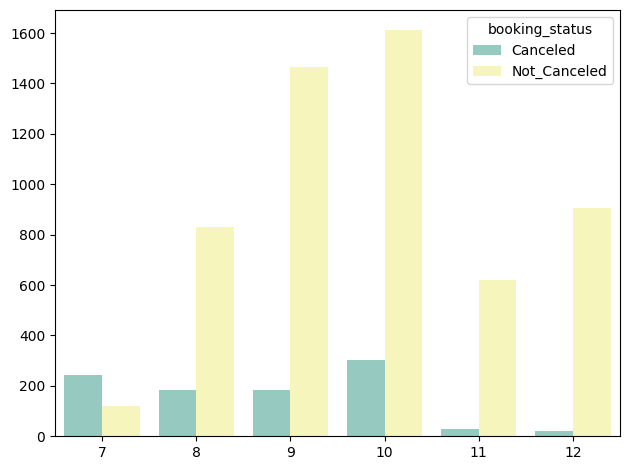

In [25]:
plt.figure()
sns.barplot(data=tot_resv_2017, x='arrival_month', y='Booking_ID', hue='booking_status', 
            estimator='mean', ci=None, palette='Set3')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
ruta_guardado = os.path.join (r'A:/Clases/Practica_Hotel/graficos', 'bkng_status_2017.png')
plt.savefig(ruta_guardado)
plt.show()

C:\Users\laigu\AppData\Local\Temp\ipykernel_21704\4167651043.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tot_resv_2018, x='arrival_month', y='Booking_ID', hue='booking_status',


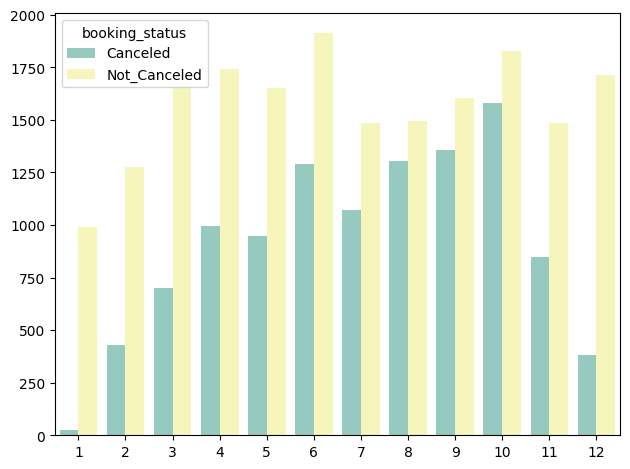

In [26]:
plt.figure()
sns.barplot(data=tot_resv_2018, x='arrival_month', y='Booking_ID', hue='booking_status', 
            estimator='mean', ci=None, palette='Set3')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
ruta_guardado = os.path.join (r'A:/Clases/Practica_Hotel/graficos', 'bkng_status_2018.png')
plt.savefig(ruta_guardado)
plt.show()

Se procede a realizar un sistema para predecir si los clientes que reservaron tiene potencial o no a cancelar la reserva en funcin de las condiciones de dichas reservas. Para ellos se utiliza un arbol de desiciones.

In [76]:
X= dataset.drop('booking_status', axis=1)
y= dataset.booking_status.copy()


In [77]:
X

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0


In [78]:
y.unique()
y.value_counts(normalize=True)*100

booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: proportion, dtype: float64

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

34902        Canceled
7800         Canceled
21836    Not_Canceled
31414    Not_Canceled
4146     Not_Canceled
             ...     
7204     Not_Canceled
16472    Not_Canceled
28288    Not_Canceled
24446    Not_Canceled
5591     Not_Canceled
Name: booking_status, Length: 10883, dtype: object

In [111]:
X_test

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
34902,INN34903,2,0,0,2,Not Selected,0,Room_Type 1,15,2018,2,12,Online,0,0,0,79.00,0
7800,INN07801,1,0,0,2,Meal Plan 1,0,Room_Type 4,2,2018,11,2,Aviation,0,0,0,94.00,0
21836,INN21837,2,0,0,2,Meal Plan 1,0,Room_Type 7,36,2018,9,16,Online,0,0,0,243.90,2
31414,INN31415,2,0,2,2,Not Selected,0,Room_Type 1,35,2018,2,19,Online,0,0,0,84.35,1
4146,INN04147,2,0,0,3,Meal Plan 1,0,Room_Type 1,5,2018,2,16,Online,0,0,0,91.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,INN07205,2,1,1,3,Meal Plan 1,0,Room_Type 1,78,2018,3,3,Offline,0,0,0,60.00,2
16472,INN16473,2,0,0,3,Meal Plan 1,0,Room_Type 4,1,2017,12,30,Online,0,0,0,197.00,1
28288,INN28289,2,0,1,4,Not Selected,0,Room_Type 1,37,2018,8,22,Online,0,0,0,105.33,1
24446,INN24447,1,0,2,0,Meal Plan 2,0,Room_Type 1,386,2018,10,23,Offline,0,0,0,90.00,0


In [112]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(X_train[['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space','room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']])

In [113]:
encoded = ohe.transform(X_train[['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space','room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']])

In [114]:
encoded_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded, index=X_train.index)

In [115]:
X_train = pd.concat([X_train, encoded_df], axis="columns")

In [116]:
encoded_test = ohe.transform(X_test[['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space','room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']])
encoded_df_test = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded_test, index=X_test.index)

In [117]:
X_test = pd.concat([X_test, encoded_df_test], axis="columns")

In [118]:
X_train = X_train.drop(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space','room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests'], axis=1)
X_test = X_test.drop(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space','room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests'], axis=1)

In [120]:
reglas = {"Not_Canceled": 1, "Canceled": 0}

y_train = y_train.map(reglas)
y_test = y_test.map(reglas)

In [121]:
y_train

28493    0
24513    1
31678    1
32750    1
29959    1
        ..
19684    1
6705     0
24603    1
33477    1
29823    0
Name: booking_status, Length: 25392, dtype: int64

In [122]:
clf = DecisionTreeClassifier(max_depth=10, random_state=42).fit(X_train, y_train)

In [123]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [124]:
print("Training")
print(classification_report(y_train, train_pred))
print("-------------------------------------------")
print("Testing")
print(classification_report(y_test, test_pred))

Training
              precision    recall  f1-score   support

           0       0.78      0.63      0.70      8319
           1       0.84      0.91      0.87     17073

    accuracy                           0.82     25392
   macro avg       0.81      0.77      0.79     25392
weighted avg       0.82      0.82      0.82     25392

-------------------------------------------
Testing
              precision    recall  f1-score   support

           0       0.77      0.61      0.68      3566
           1       0.83      0.91      0.87      7317

    accuracy                           0.81     10883
   macro avg       0.80      0.76      0.78     10883
weighted avg       0.81      0.81      0.81     10883



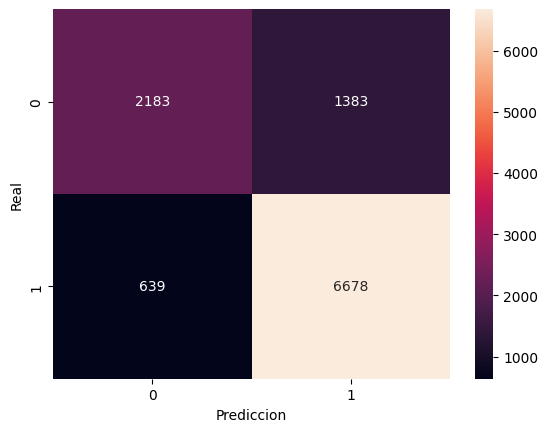

Presicion del Modelo: 0.8142056418267022


In [125]:
y_pred_class=clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.show()

accuracy=accuracy_score(y_test, y_pred_class)
print(f'Presicion del Modelo: {accuracy}')